# Your First Neural Network

### Exercise objectives
- Write your first Neural Network
- Inspect some of the most important hyperparameters of Neural Networks

<hr>
<hr>


In this exercise, you will build your first Neural Network that will separate two classes.
Each data $X$ has only two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or to the class 1. It is called the `moons dataset`. 

As there are only two features, the points can be represented on a 2D-scatterplot, where the colors correspond to the two available classes: $\color{blue}{blue}$ and $\color{red}{red} $. Here is an example of such data : 

![Two moons](moons_example.png)



## 1. Create data

Here, we will use the scikit-learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. Each moon correspond to a class.

In [1]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import sklearn
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
### Data generation
moon = sklearn.datasets.make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
moon

(array([[-7.18349350e-01,  6.95682551e-01],
        [ 7.77479066e-01, -4.74927912e-01],
        [ 1.59599895e-01,  9.87181783e-01],
        [ 1.90096887e+00,  6.61162609e-02],
        [ 9.67948422e-01, -4.99486216e-01],
        [-1.59599895e-01,  9.87181783e-01],
        [ 1.87131870e+00,  9.28244800e-03],
        [ 1.00000000e+00,  0.00000000e+00],
        [ 2.38554042e-01, -1.48228395e-01],
        [ 5.09442530e-02,  1.84891782e-01],
        [ 1.83808810e+00, -4.55349012e-02],
        [-9.00968868e-01,  4.33883739e-01],
        [ 3.20515776e-02,  9.99486216e-01],
        [ 6.54634946e-01, -4.38468422e-01],
        [ 9.00968868e-01,  4.33883739e-01],
        [ 1.71834935e+00, -1.95682551e-01],
        [ 9.67294863e-01,  2.53654584e-01],
        [ 8.01413622e-01,  5.98110530e-01],
        [ 3.27699110e-01, -2.40277997e-01],
        [ 2.84527587e-01,  9.58667853e-01],
        [ 1.76144596e+00, -1.48228395e-01],
        [ 8.40400105e-01, -4.87181783e-01],
        [ 9.26916757e-01,  3.752

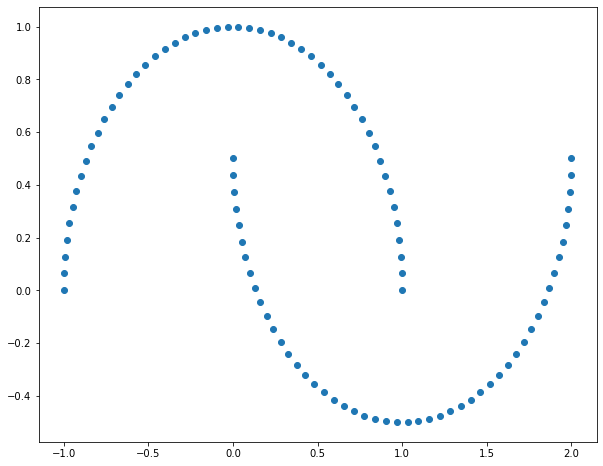

In [3]:
df = pd.DataFrame(moon[0])
plt.figure(figsize=(10, 8))

plt.scatter(df[0], df[1])
plt.show()

❓ Play with the number of samples and the noise to discover the effects on the moons dataset, by plotting the moons for different values

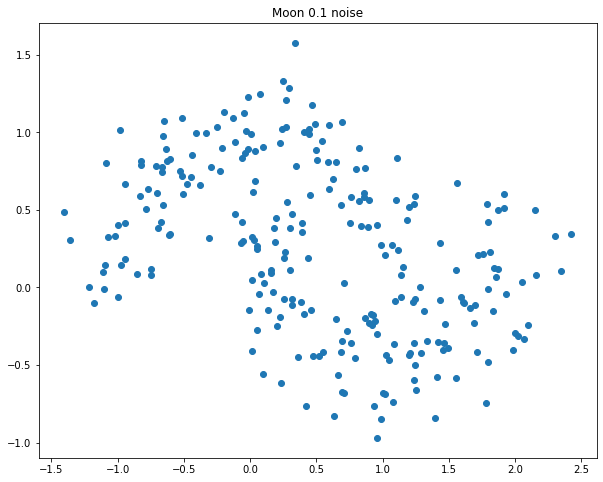

In [4]:
moon_01 = sklearn.datasets.make_moons(n_samples=250, shuffle=True, noise=0.2, random_state=None)
df = pd.DataFrame(moon_01[0])


plt.figure(figsize=(10, 8))
plt.title("Moon 0.1 noise")
plt.scatter(df[0], df[1])
plt.show()

❓ Draw 250 samples of the data with a noise equal to 0.20 (random state being 0) and split the initial dataset into a train and test set (size: 70/30%)

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [5]:
from sklearn.model_selection import train_test_split
x = moon_01[0]
y = moon_01[1]
x_train, x_test,y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.30,shuffle=True)
y

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

## 2. Simple model

You will now define your first neural network.
The architecture of your model should have : 
- a first layer with 5 neurons, with a `relu` activation function and the correct input dimension
- a output layer suited to your 2-class classification task.


❓ Complete the next function with the previous architecture

In [6]:
def initialize_model():
    # define the keras model
    model = Sequential()
    model.add(Dense(5, input_dim=2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    return model

model = initialize_model()

❗ **Remark** ❗ Briefly speaking, the **`.compile()`** tells your algorithm how to optimize the weights of your network once it will be fit on real data. **`binary_crossentropy`** is the "log-loss" that you have have to use and explain

❓ How many parameters does the model have?  
Double check using the **`.summary()`** function which displays the stack of layers, the shape of the output after each layer, and the number of parameters of each layer. Use this function to check that you have 21 parameters i.e. weights in your model.

In [7]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


You are now ready to train your algorithm on the training set:

In [9]:
# fit the keras model on the dataset
model.fit(x, y, epochs=200, batch_size=8)

Epoch 1/200
32/32 [==============================] - 1s 2ms/step - loss: 0.6045 - accuracy: 0.7760
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7720
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5693 - accuracy: 0.7800
Epoch 4/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.7800
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5417 - accuracy: 0.7840
Epoch 6/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5296 - accuracy: 0.7840
Epoch 7/200
32/32 [==============================] - 0s 2ms/step - loss: 0.5183 - accuracy: 0.7880
Epoch 8/200
32/32 [==============================] - 0s 1ms/step - loss: 0.5079 - accuracy: 0.7880
Epoch 9/200
32/32 [==============================] - 0s 2ms/step - loss: 0.4975 - accuracy: 0.7920
Epoch 10/200
32/32 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7880
Epoch 11/

Epoch 83/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2664 - accuracy: 0.8800
Epoch 84/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2661 - accuracy: 0.8800
Epoch 85/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2653 - accuracy: 0.8800
Epoch 86/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8800
Epoch 87/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2647 - accuracy: 0.8800
Epoch 88/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2640 - accuracy: 0.8800
Epoch 89/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2639 - accuracy: 0.8800
Epoch 90/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2634 - accuracy: 0.8800
Epoch 91/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2632 - accuracy: 0.8800
Epoch 92/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2625 - accuracy: 0.8800


32/32 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.8880
Epoch 165/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8920
Epoch 166/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.8840
Epoch 167/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8960
Epoch 168/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2526 - accuracy: 0.8960
Epoch 169/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2524 - accuracy: 0.8880
Epoch 170/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.8920
Epoch 171/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2522 - accuracy: 0.8920
Epoch 172/200
32/32 [==============================] - 0s 1ms/step - loss: 0.2525 - accuracy: 0.8880
Epoch 173/200
32/32 [==============================] - 0s 2ms/step - loss: 0.2523 - accuracy: 0.8920
Epoc

### Fit history

`history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will see epoch-by-epoch info stored in `history.history`

In [10]:
model.history.__dict__

{'validation_data': None,
 'model': <keras.engine.sequential.Sequential at 0x265b53f05b0>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.6044690012931824,
   0.585187554359436,
   0.5693160891532898,
   0.555187463760376,
   0.5417396426200867,
   0.5296003222465515,
   0.5182514190673828,
   0.5079017281532288,
   0.49747294187545776,
   0.48798125982284546,
   0.4782716631889343,
   0.4690383970737457,
   0.4598388671875,
   0.4506828486919403,
   0.4417172968387604,
   0.43302270770072937,
   0.42421481013298035,
   0.4161476492881775,
   0.40836724638938904,
   0.40075400471687317,
   0.3936055898666382,
   0.386211633682251,
   0.3797769546508789,
   0.3736450672149658,
   0.36817309260368347,
   0.3632431626319885,
   0.3582642078399658,
   0.35350048542022705,
   0.34898102283477783,
   0.34479814767837524,
   0.34077054262161255,
   0.33706197142601013,
   0.33378836512565613,
   0.3306826651096344,
   0.3275454342365265,
   0.324713200330734

❓ Plot the history of the train loss using the following function

In [11]:
df= pd.DataFrame(model.history.history)

In [12]:
df

,loss,accuracy
0,0.604469,0.776
1,0.585188,0.772
2,0.569316,0.780
3,0.555187,0.780
4,0.541740,0.784
...,...,...
195,0.251467,0.888
196,0.251360,0.888
197,0.251489,0.892
198,0.251400,0.892


<AxesSubplot:>

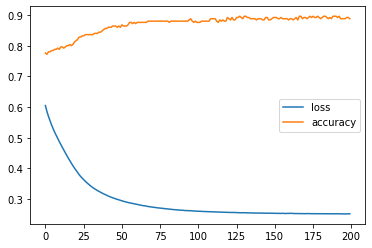

In [13]:
df.plot()

### Predict & Evaluate performance on test set

You can predict `y_pred` using the **`.predict()`** method.

In [14]:
y_pred = model.predict(x_test)
print(y_pred)

3/3 [==============================] - 0s 0s/step
[[2.4390657e-02]
 [9.3863028e-01]
 [9.2739582e-01]
 [9.7762245e-01]
 [9.7430849e-01]
 [1.6776870e-01]
 [9.6756732e-01]
 [9.7126651e-01]
 [6.6410219e-03]
 [1.9250785e-03]
 [7.9992098e-01]
 [9.8086482e-01]
 [9.1177821e-01]
 [8.7547874e-01]
 [9.6100640e-01]
 [9.0569204e-01]
 [9.5284265e-01]
 [2.4637207e-03]
 [9.8022997e-01]
 [9.1422647e-01]
 [3.0858433e-01]
 [2.3535283e-02]
 [2.4657986e-01]
 [3.5942161e-01]
 [1.1944024e-01]
 [9.6610135e-01]
 [8.6603656e-02]
 [3.5863554e-01]
 [9.1943628e-01]
 [9.5085031e-01]
 [4.0329978e-02]
 [3.1489304e-01]
 [9.7770256e-01]
 [4.9774471e-01]
 [9.4511229e-01]
 [2.3791726e-01]
 [9.8234403e-01]
 [9.5170087e-01]
 [9.7546828e-01]
 [8.0855364e-01]
 [6.4703888e-01]
 [7.1474677e-01]
 [3.1894211e-02]
 [9.7330385e-01]
 [4.1735521e-01]
 [8.6604536e-01]
 [9.5475286e-01]
 [1.7043947e-03]
 [1.1715726e-01]
 [7.6986313e-01]
 [2.9309770e-01]
 [6.0827266e-03]
 [3.3529237e-01]
 [9.0254843e-01]
 [1.2225931e-01]
 [9.7647166e-01

You can use the **`.evaluate()`** method to return the **`loss value`** &  and the **`performance metrics`**

In [15]:
# evaluate the keras model
accuracy = model.evaluate(x_test, y_test)
print(accuracy)

3/3 [==============================] - 0s 0s/step - loss: 0.1785 - accuracy: 0.9333
[0.1785096824169159, 0.9333333373069763]


- The first element corresponds to the **loss** value, set to `"binary_crossentropy"` in `model.compile()`. Its value is hard to interpret.

- The second element is the **metrics**, that we set to `"accuracy"`

❓ What is your accuracy on the test test? Store the value as a `float` in the `accuracy` variable.

In [16]:
accuracy = float(accuracy[1])
print(accuracy)

0.9333333373069763


❓ Check your prediction visually by using our `plot_decision_regions` available in `utils/plots.py`. It looks a bit underfitted, right? We will create a deeper network next!

1744/1744 [==============================] - 1s 832us/step


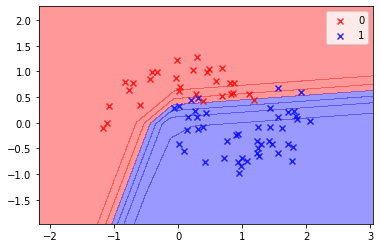

In [17]:
from utils.plots import plot_decision_regions

plot_decision_regions(x_test, y_test, model, test_idx=None, resolution=0.02)

2081/2081 [==============================] - 2s 819us/step


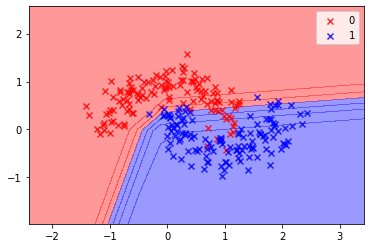

In [18]:
plot_decision_regions(x, y, model, test_idx=None, resolution=0.02)

## 3. Variations

❓ Relaunch the model on 500 iterations
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learnt on the previous fit!!)
- Plot the history to see how the loss changed over the different epochs/iterations.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 15        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
22/22 [==============================] - 0s 476us/step - loss: 0.6237 - accuracy: 0.6571
Epoch 2/500
22/22 [==============================] - 0s 744us/step - loss: 0.5977 - accuracy: 0.8286
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 0.5746 - accuracy: 0.8514
Epoch 4/500
22/22 [==============================] - 0s 744us/step - loss: 0.5534 - accuracy: 0.8343
Epoch 5/500
22/22 [==============================] -

22/22 [==============================] - 0s 1ms/step - loss: 0.3070 - accuracy: 0.8743
Epoch 76/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3062 - accuracy: 0.8686
Epoch 77/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3058 - accuracy: 0.8686
Epoch 78/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3052 - accuracy: 0.8686
Epoch 79/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8686
Epoch 80/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3041 - accuracy: 0.8686
Epoch 81/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.8686
Epoch 82/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8686
Epoch 83/500
22/22 [==============================] - 0s 744us/step - loss: 0.3026 - accuracy: 0.8686
Epoch 84/500
22/22 [==============================] - 0s 744us/step - loss: 0.3025 - accuracy: 0.8686
Epoch 85/

22/22 [==============================] - 0s 1ms/step - loss: 0.2862 - accuracy: 0.8571
Epoch 156/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2859 - accuracy: 0.8571
Epoch 157/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8571
Epoch 158/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2856 - accuracy: 0.8571
Epoch 159/500
22/22 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 160/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8571
Epoch 161/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2858 - accuracy: 0.8571
Epoch 162/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8571
Epoch 163/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2851 - accuracy: 0.8571
Epoch 164/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8571
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.8686
Epoch 236/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2789 - accuracy: 0.8686
Epoch 237/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2788 - accuracy: 0.8686
Epoch 238/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2789 - accuracy: 0.8686
Epoch 239/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8686
Epoch 240/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.8686
Epoch 241/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2783 - accuracy: 0.8686
Epoch 242/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2784 - accuracy: 0.8686
Epoch 243/500
22/22 [==============================] - 0s 744us/step - loss: 0.2784 - accuracy: 0.8686
Epoch 244/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2785 - accuracy: 0.8686
Ep

22/22 [==============================] - 0s 1ms/step - loss: 0.2760 - accuracy: 0.8629
Epoch 316/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8743
Epoch 317/500
22/22 [==============================] - 0s 744us/step - loss: 0.2757 - accuracy: 0.8800
Epoch 318/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.8743
Epoch 319/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8800
Epoch 320/500
22/22 [==============================] - 0s 995us/step - loss: 0.2757 - accuracy: 0.8800
Epoch 321/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8800
Epoch 322/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2765 - accuracy: 0.8686
Epoch 323/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2758 - accuracy: 0.8800
Epoch 324/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2756 - accuracy: 0.8743


22/22 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8743
Epoch 396/500
22/22 [==============================] - 0s 744us/step - loss: 0.2748 - accuracy: 0.8743
Epoch 397/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8743
Epoch 398/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8800
Epoch 399/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8743
Epoch 400/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2748 - accuracy: 0.8743
Epoch 401/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.8743
Epoch 402/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2748 - accuracy: 0.8743
Epoch 403/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2749 - accuracy: 0.8743
Epoch 404/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2746 - accuracy: 0.8743
Ep

22/22 [==============================] - 0s 2ms/step - loss: 0.2744 - accuracy: 0.8743
Epoch 476/500
22/22 [==============================] - 0s 744us/step - loss: 0.2744 - accuracy: 0.8743
Epoch 477/500
22/22 [==============================] - 0s 742us/step - loss: 0.2750 - accuracy: 0.8743
Epoch 478/500
22/22 [==============================] - 0s 744us/step - loss: 0.2750 - accuracy: 0.8743
Epoch 479/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.8743
Epoch 480/500
22/22 [==============================] - 0s 744us/step - loss: 0.2747 - accuracy: 0.8800
Epoch 481/500
22/22 [==============================] - 0s 744us/step - loss: 0.2741 - accuracy: 0.8743
Epoch 482/500
22/22 [==============================] - 0s 2ms/step - loss: 0.2743 - accuracy: 0.8743
Epoch 483/500
22/22 [==============================] - 0s 792us/step - loss: 0.2747 - accuracy: 0.8743
Epoch 484/500
22/22 [==============================] - 0s 1ms/step - loss: 0.2744 - accuracy:

<AxesSubplot:>

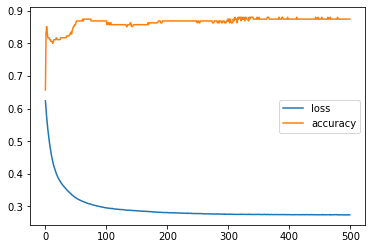

In [19]:
model = initialize_model()
model.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics=['accuracy'])
model.summary()
results = model.fit(x_train, y_train, batch_size=8, epochs=500)
df= pd.DataFrame(model.history.history)
df.plot()

❓ Did the test accuracy improve?

3/3 [==============================] - 0s 2ms/step - loss: 0.1948 - accuracy: 0.9467
Accuracy: 94.67
1744/1744 [==============================] - 2s 1ms/step


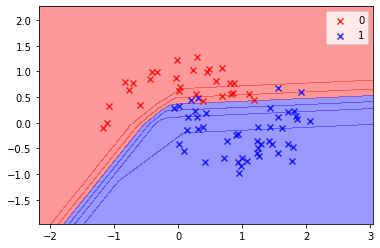

In [20]:
y_pred = model.predict(x_test)
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))
plot_decision_regions(x_test, y_test, model, test_idx=None, resolution=0.02)

Not necessarily...So when should we stop training a Deep Learning Model?
Answer in the next chapter `Optimizers, Loss, Fitting` of this `Deep Learning Module` !

❓ Let's try a **deeper** architecture that includes : 

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suited for this problem


In [21]:
def initialize_model():
    # define the keras model
    model = Sequential()
    model.add(Dense(20, input_dim=2, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))


    return model

model = initialize_model()

❓ What is the number of parameters of your new model?

In [22]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                60        
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


Run your model on the previous data with 500 epochs and plot the loss afterwards.  
❓ What is your accuracy on the test test? Store it as `accuracy_deep` variable (`float`).

Epoch 1/500
22/22 [==============================] - 1s 2ms/step - loss: 0.6429 - accuracy: 0.7714
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6045 - accuracy: 0.7714
Epoch 3/500
22/22 [==============================] - 0s 1ms/step - loss: 0.5606 - accuracy: 0.8000
Epoch 4/500
22/22 [==============================] - 0s 1ms/step - loss: 0.5148 - accuracy: 0.8057
Epoch 5/500
22/22 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.8114
Epoch 6/500
22/22 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8229
Epoch 7/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3923 - accuracy: 0.8229
Epoch 8/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8457
Epoch 9/500
22/22 [==============================] - 0s 1ms/step - loss: 0.3445 - accuracy: 0.8571
Epoch 10/500
22/22 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8686
Epoch 11/

22/22 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9657
Epoch 84/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1068 - accuracy: 0.9657
Epoch 85/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9657
Epoch 86/500
22/22 [==============================] - 0s 2ms/step - loss: 0.1018 - accuracy: 0.9657
Epoch 87/500
22/22 [==============================] - 0s 1ms/step - loss: 0.1015 - accuracy: 0.9657
Epoch 88/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0998 - accuracy: 0.9657
Epoch 89/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0986 - accuracy: 0.9657
Epoch 90/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0970 - accuracy: 0.9657
Epoch 91/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9657
Epoch 92/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9657
Epoch 93/500


22/22 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9714
Epoch 165/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0671 - accuracy: 0.9771
Epoch 166/500
22/22 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.9771
Epoch 167/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0671 - accuracy: 0.9771
Epoch 168/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0662 - accuracy: 0.9771
Epoch 169/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0686 - accuracy: 0.9714
Epoch 170/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0650 - accuracy: 0.9829
Epoch 171/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0656 - accuracy: 0.9829
Epoch 172/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0667 - accuracy: 0.9714
Epoch 173/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0639 - accuracy: 0.9829
Epoc

22/22 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9771
Epoch 246/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9829
Epoch 247/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9829
Epoch 248/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9829
Epoch 249/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9829
Epoch 250/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0573 - accuracy: 0.9829
Epoch 251/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0566 - accuracy: 0.9771
Epoch 252/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9771
Epoch 253/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0561 - accuracy: 0.9771
Epoch 254/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9714
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.0492 - accuracy: 0.9829
Epoch 327/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9829
Epoch 328/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9771
Epoch 329/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9829
Epoch 330/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9714
Epoch 331/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9829
Epoch 332/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9829
Epoch 333/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0499 - accuracy: 0.9829
Epoch 334/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9829
Epoch 335/500
22/22 [==============================] - 0s 2ms/step - loss: 0.0503 - accuracy: 0.9829
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9829
Epoch 408/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.9829
Epoch 409/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.9771
Epoch 410/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0408 - accuracy: 0.9829
Epoch 411/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0416 - accuracy: 0.9829
Epoch 412/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9829
Epoch 413/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9829
Epoch 414/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0417 - accuracy: 0.9771
Epoch 415/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0423 - accuracy: 0.9829
Epoch 416/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0413 - accuracy: 0.9829
Epoc

22/22 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 0.9829
Epoch 489/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0348 - accuracy: 0.9829
Epoch 490/500
22/22 [==============================] - 0s 744us/step - loss: 0.0338 - accuracy: 0.9829
Epoch 491/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9829
Epoch 492/500
22/22 [==============================] - 0s 891us/step - loss: 0.0334 - accuracy: 0.9829
Epoch 493/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0331 - accuracy: 0.9829
Epoch 494/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0329 - accuracy: 0.9829
Epoch 495/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0334 - accuracy: 0.9829
Epoch 496/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0326 - accuracy: 0.9829
Epoch 497/500
22/22 [==============================] - 0s 1ms/step - loss: 0.0339 - accuracy: 0.9829


<AxesSubplot:>

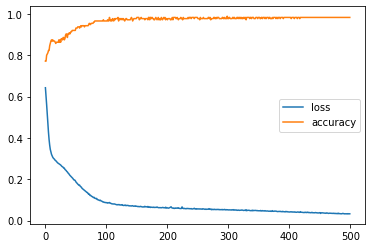

In [23]:
results = model.fit(x_train, y_train, batch_size=8, epochs=500)
accuracy_deep= pd.DataFrame(model.history.history)
accuracy_deep.plot()

In [24]:
y_pred = model.predict(x_test)
metrics = model.evaluate(x_test, y_test)
print(metrics)
accuracy_deep = metrics[1]
print(accuracy_deep)

3/3 [==============================] - 0s 0s/step - loss: 0.1868 - accuracy: 0.9733
[0.18682509660720825, 0.9733333587646484]
0.9733333587646484


❓ Do you think we have overfitted on the noise? Check it out below

2081/2081 [==============================] - 2s 1ms/step


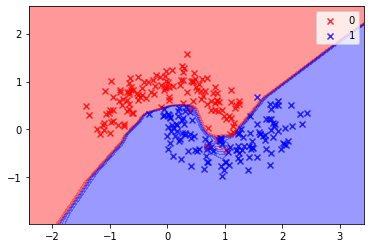

In [25]:
plot_decision_regions(x, y, model, test_idx=None, resolution=0.02)

Yes we have overfitted